In [1]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
import corner as corner
from gwpopulation.utils import powerlaw
import glob
import corner as corner
import os


/cvmfs/software.igwn.org/conda/envs/igwn/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [6]:

def parabola_m2min_m1(mass1, mmax, mmin, gamma, zeta):
    m2min = mmin + gamma*(mass1 - mmin) + zeta * (mass1 - mmin)**2
    return m2min


All Gamma/Zeta model

In [7]:
parabola_allgamma_zeta_dynesty = h5py.File('O4a_parabolam2min_prod_allgammazeta/result/bbh_mass_parabola_m2min_allgammazeta_redshift_powerlaw_result.hdf5')
parabola_no190814 = h5py.File('O4a_parabolam2min_prod_allgammazeta_no190814/result/bbh_mass_parabola_m2min_allgammazeta_redshift_powerlaw_result.hdf5')

In [8]:
parabola_dynesty_dict = {'alpha':parabola_allgamma_zeta_dynesty['posterior']['alpha'], 
                         'beta':parabola_allgamma_zeta_dynesty['posterior']['beta'], 
                         'gamma':parabola_allgamma_zeta_dynesty['posterior']['gamma'],
                         'zeta':parabola_allgamma_zeta_dynesty['posterior']['zeta'],
                         'mmin': parabola_allgamma_zeta_dynesty['posterior']['mmin'], 
                         'mmax': parabola_allgamma_zeta_dynesty['posterior']['mmax']}
parabola_no190814_dict = {'alpha':parabola_no190814['posterior']['alpha'], 
                         'beta':parabola_no190814['posterior']['beta'], 
                         'gamma':parabola_no190814['posterior']['gamma'],
                         'zeta':parabola_no190814['posterior']['zeta'],
                         'mmin': parabola_no190814['posterior']['mmin'], 
                         'mmax': parabola_no190814['posterior']['mmax']}

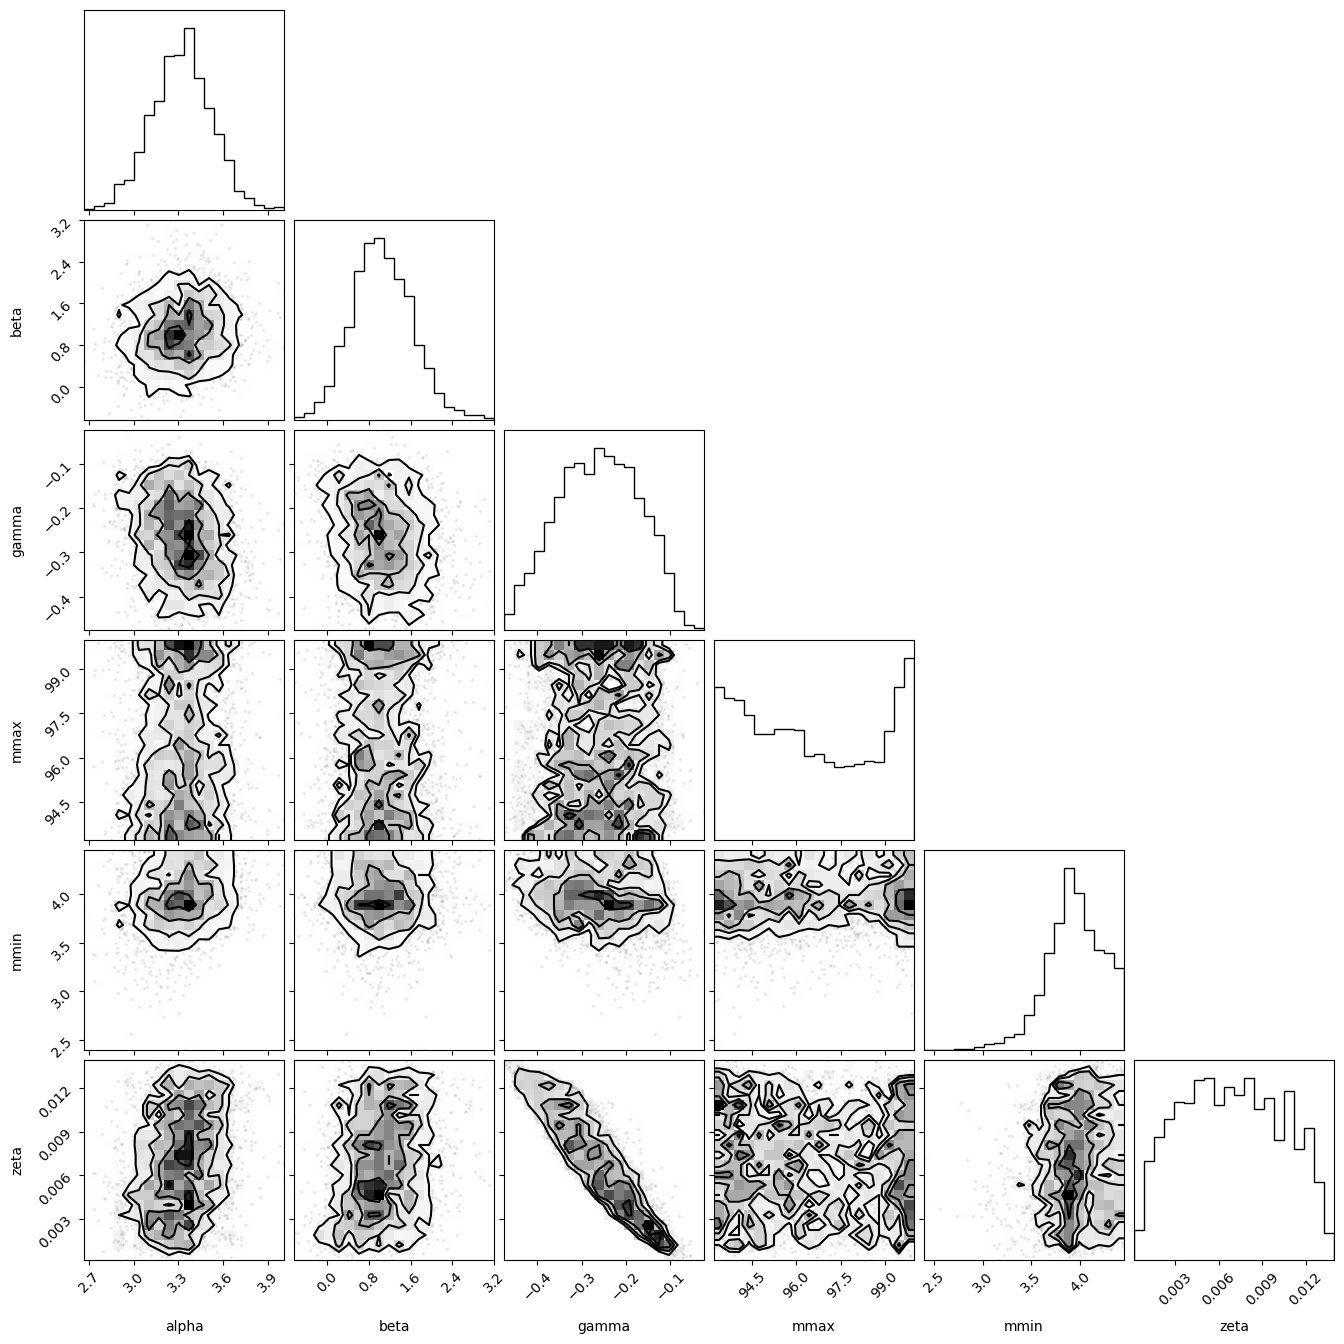

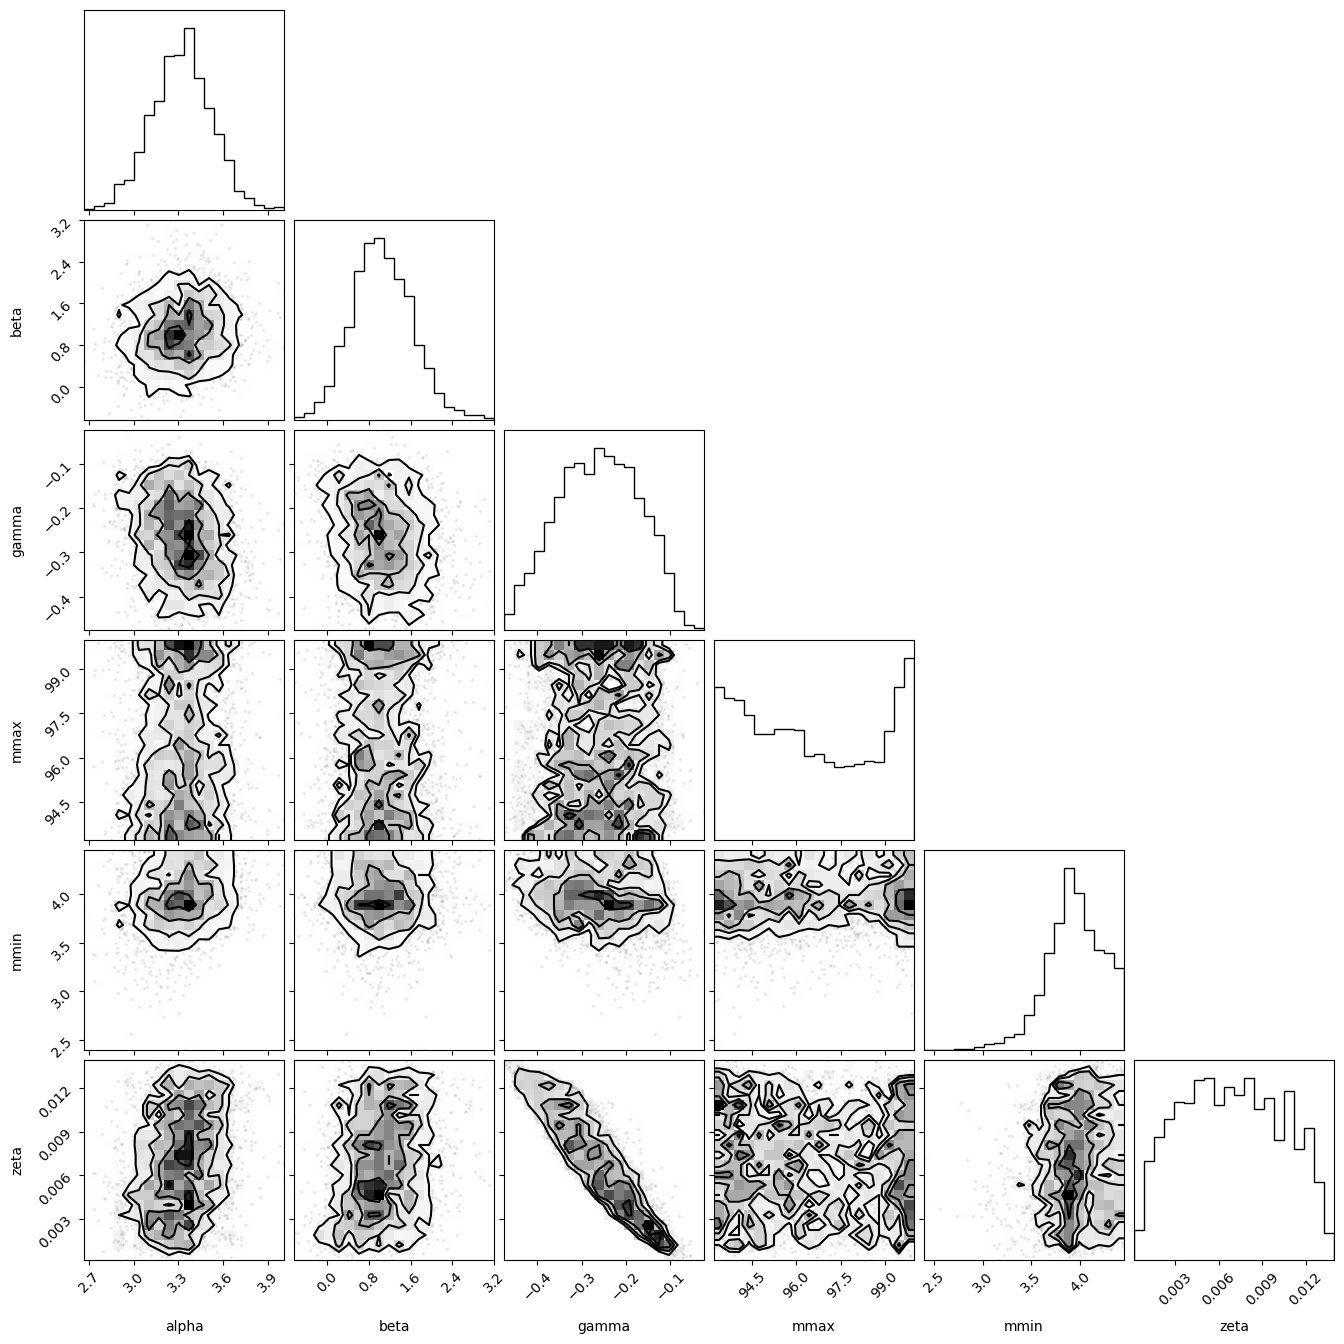

In [13]:
corner.corner(parabola_dynesty_dict)

In [9]:
plt.rcParams["figure.figsize"] = (12,8)

for i in range(2566):#len(result['posterior']['alpha'])):
        
    
    mass1_parabola_dyn = np.linspace(parabola_no190814_dict['mmin'][i], parabola_no190814_dict['mmax'][i],1000)
    m2min_parabola_dyn = parabola_m2min_m1(mass1_parabola_dyn, parabola_no190814_dict['mmax'][i], parabola_no190814_dict['mmin'][i],\
                     parabola_no190814_dict['gamma'][i], parabola_no190814_dict['zeta'][i])
    plt.plot(mass1_parabola_dyn, m2min_parabola_dyn, color='skyblue', alpha=0.01)

for filename in glob.glob("m1_q_event_samples/IGWN-GWTC2p1-v2-GW190814_211039_PEDataRelease_mixed_nocosmo.h5"):
    mass1= h5py.File(filename)['mass_1']
    q=h5py.File(filename)['mass_ratio']
    
    eventname = (os.path.basename(filename))[16:24]
    if np.median(q)<0.5:
        corner.hist2d(np.array(mass1),np.array(q)*np.array(mass1), fill_contours=True, plot_density=False,\
                  range=[(0,100), (-4,100)], color='orange')
        plt.scatter(np.median(mass1),np.median(np.array(q)*np.array(mass1)), label=f'{eventname}', color='orange')
        i+=1


mass1_prior = np.linspace(2., 100.,1000)
plt.plot(mass1_prior, parabola_m2min_m1(mass1_prior, 100.,0.,0.,0.), color='limegreen', ls='dashed',\
         linewidth=2., label='m2min=0', alpha=0.5)
#plt.plot(mass1_prior, PL_m2min_m1(mass1_prior, 100.,2.,35.), color='teal', ls='dashed', label='PL prior')
plt.legend()
#dummy, = plt.plot(x[0], y[0], color='black', linestyle='solid')
plt.xlabel(r'$m_1$')
plt.ylabel(r'$m_2^{\rm min}$')

NameError: name 'parabola_nestle_dict' is not defined

Text(0, 0.5, '$m_2^{\\rm min}$')

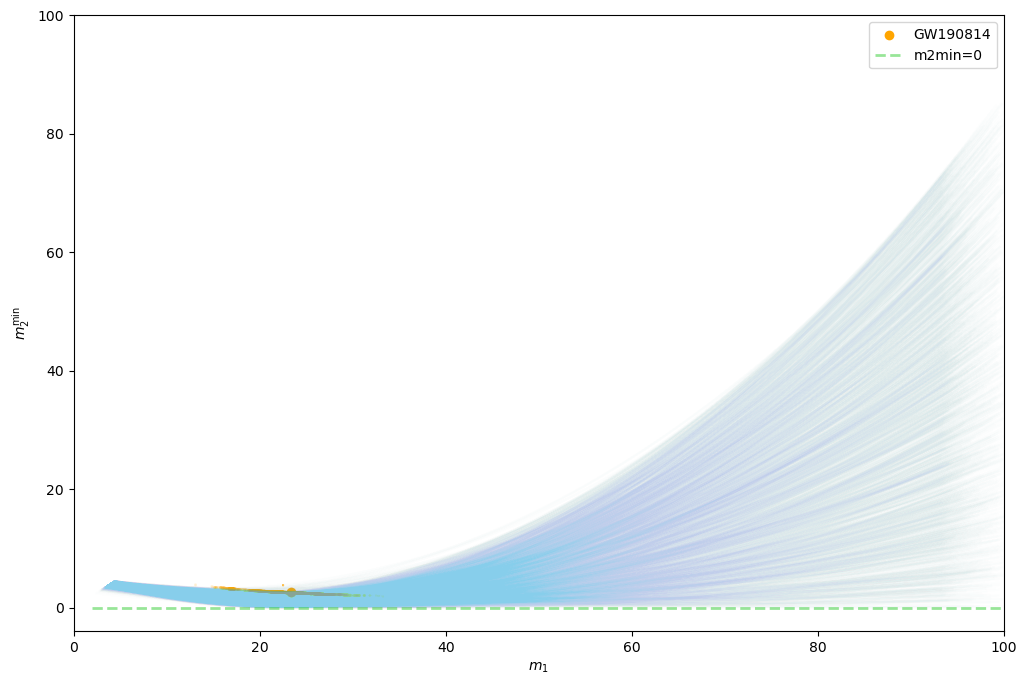

In [12]:
plt.rcParams["figure.figsize"] = (12,8)

for i in range(2371):#len(result['posterior']['alpha'])):
    
    mass1_parabola_dyn = np.linspace(parabola_dynesty_dict['mmin'][i], parabola_dynesty_dict['mmax'][i],1000)
    m2min_parabola_dyn = parabola_m2min_m1(mass1_parabola_dyn, parabola_dynesty_dict['mmax'][i], parabola_dynesty_dict['mmin'][i],\
                     parabola_dynesty_dict['gamma'][i], parabola_dynesty_dict['zeta'][i])
    plt.plot(mass1_parabola_dyn, m2min_parabola_dyn, color='skyblue', alpha=0.01)
    
    if np.min(m2min_parabola_dyn)<0:
        print(np.min(m2min_parabola_dyn))
        print(parabola_dynesty_dict['mmax'][i], parabola_dynesty_dict['mmin'][i],\
                     parabola_dynesty_dict['gamma'][i], parabola_dynesty_dict['zeta'][i])

for filename in glob.glob("m1_q_event_samples/IGWN-GWTC2p1-v2-GW190814_211039_PEDataRelease_mixed_nocosmo.h5"):
    mass1= h5py.File(filename)['mass_1']
    q=h5py.File(filename)['mass_ratio']
    
    eventname = (os.path.basename(filename))[16:24]
    if np.median(q)<0.5:
        corner.hist2d(np.array(mass1),np.array(q)*np.array(mass1), fill_contours=True, plot_density=False,\
                  range=[(0,100), (-4,100)], color='orange')
        plt.scatter(np.median(mass1),np.median(np.array(q)*np.array(mass1)), label=f'{eventname}', color='orange')
        i+=1


mass1_prior = np.linspace(2., 100.,1000)
plt.plot(mass1_prior, parabola_m2min_m1(mass1_prior, 100.,0.,0.,0.), color='limegreen', ls='dashed',\
         linewidth=2., label='m2min=0', alpha=0.5)
#plt.plot(mass1_prior, PL_m2min_m1(mass1_prior, 100.,2.,35.), color='teal', ls='dashed', label='PL prior')
plt.legend()
#dummy, = plt.plot(x[0], y[0], color='black', linestyle='solid')
plt.xlabel(r'$m_1$')
plt.ylabel(r'$m_2^{\rm min}$')

Text(0, 0.5, '$m_2^{\\rm min}$')

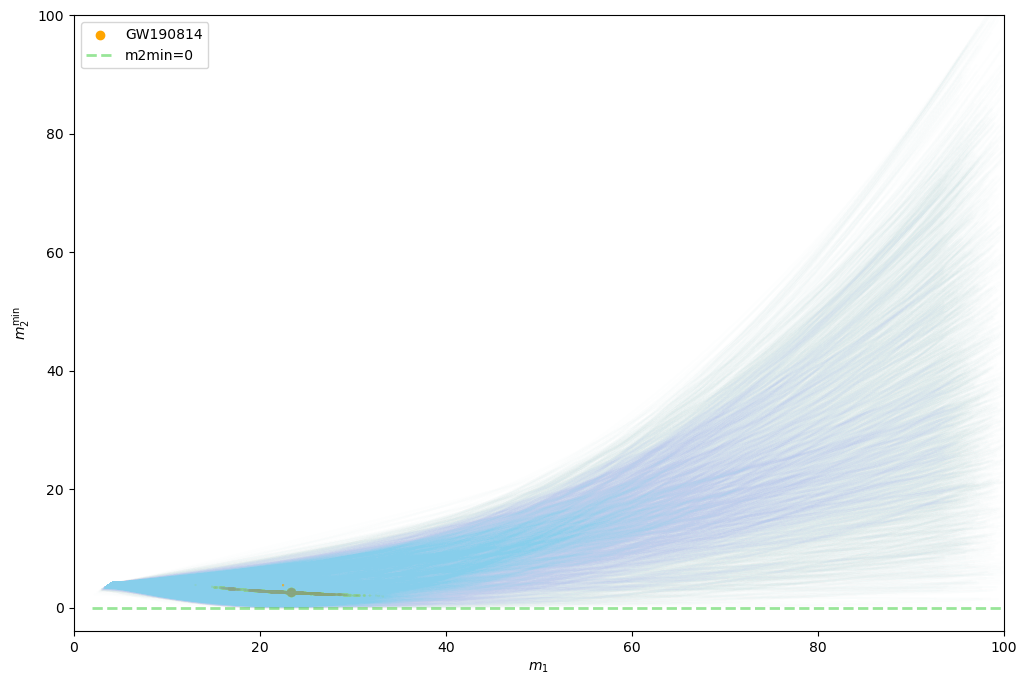

In [9]:
plt.rcParams["figure.figsize"] = (12,8)

for i in range(2566):#len(result['posterior']['alpha'])):
    
    mass1_parabola_dyn = np.linspace(parabola_no190814_dict['mmin'][i], parabola_no190814_dict['mmax'][i],1000)
    m2min_parabola_dyn = parabola_m2min_m1(mass1_parabola_dyn, parabola_no190814_dict['mmax'][i], parabola_no190814_dict['mmin'][i],\
                     parabola_no190814_dict['gamma'][i], parabola_no190814_dict['zeta'][i])
    plt.plot(mass1_parabola_dyn, m2min_parabola_dyn, color='skyblue', alpha=0.01)

for filename in glob.glob("m1_q_event_samples/IGWN-GWTC2p1-v2-GW190814_211039_PEDataRelease_mixed_nocosmo.h5"):
    mass1= h5py.File(filename)['mass_1']
    q=h5py.File(filename)['mass_ratio']
    
    eventname = (os.path.basename(filename))[16:24]
    if np.median(q)<0.5:
        corner.hist2d(np.array(mass1),np.array(q)*np.array(mass1), fill_contours=True, plot_density=False,\
                  range=[(0,100), (-4,100)], color='orange')
        plt.scatter(np.median(mass1),np.median(np.array(q)*np.array(mass1)), label=f'{eventname}', color='orange')
        i+=1


mass1_prior = np.linspace(2., 100.,1000)
plt.plot(mass1_prior, parabola_m2min_m1(mass1_prior, 100.,0.,0.,0.), color='limegreen', ls='dashed',\
         linewidth=2., label='m2min=0', alpha=0.5)
#plt.plot(mass1_prior, PL_m2min_m1(mass1_prior, 100.,2.,35.), color='teal', ls='dashed', label='PL prior')
plt.legend()
#dummy, = plt.plot(x[0], y[0], color='black', linestyle='solid')
plt.xlabel(r'$m_1$')
plt.ylabel(r'$m_2^{\rm min}$')

Text(0, 0.5, '$m_2^{\\rm min}$')

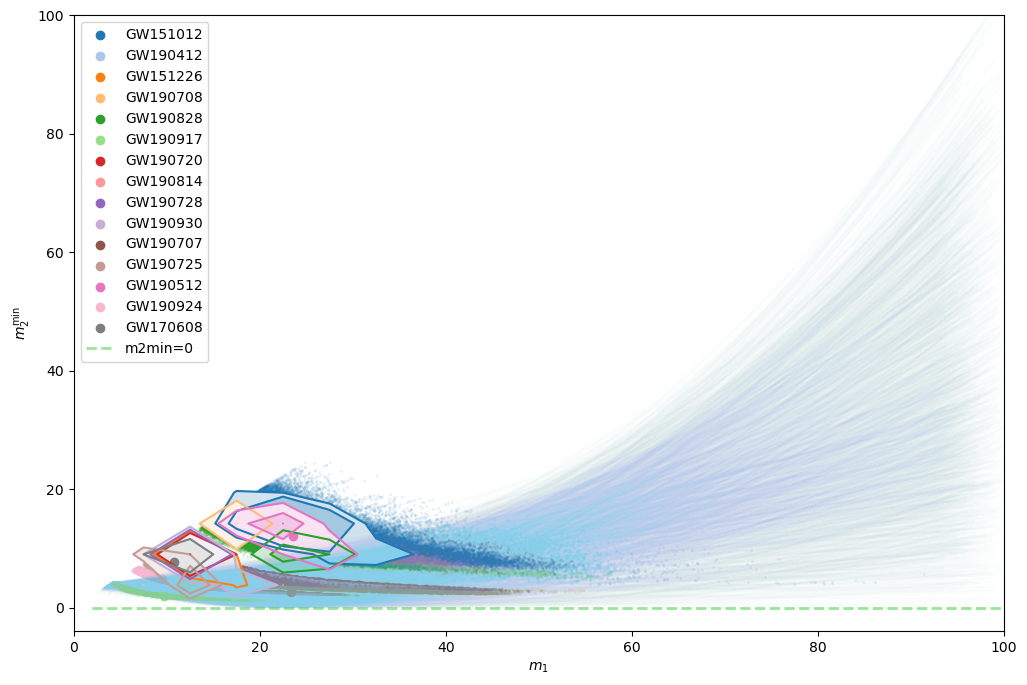

In [21]:
plt.rcParams["figure.figsize"] = (12,8)
cmap = plt.colormaps['tab20']
# Take colors at regular intervals spanning the colormap.
colors = cmap(np.linspace(0, 1, 20))
j=0

for i in range(2566):#len(result['posterior']['alpha'])):
    
    mass1_parabola_dyn = np.linspace(parabola_no190814_dict['mmin'][i], parabola_no190814_dict['mmax'][i],1000)
    m2min_parabola_dyn = parabola_m2min_m1(mass1_parabola_dyn, parabola_no190814_dict['mmax'][i], parabola_no190814_dict['mmin'][i],\
                     parabola_no190814_dict['gamma'][i], parabola_no190814_dict['zeta'][i])
    plt.plot(mass1_parabola_dyn, m2min_parabola_dyn, color='skyblue', alpha=0.01)

for filename in glob.glob("m1_q_event_samples/IGWN-GWTC2p1*.h5"):
    mass1= h5py.File(filename)['mass_1']
    q=h5py.File(filename)['mass_ratio']
    
    eventname = (os.path.basename(filename))[16:24]
    if np.median(np.array(q)*np.array(mass1))<15:
        corner.hist2d(np.array(mass1),np.array(q)*np.array(mass1), fill_contours=True, plot_density=False,\
                  range=[(0,100), (-4,100)], color=colors[j])
        plt.scatter(np.median(mass1),np.median(np.array(q)*np.array(mass1)), label=f'{eventname}', color=colors[j])
        j+=1


mass1_prior = np.linspace(2., 100.,1000)
plt.plot(mass1_prior, parabola_m2min_m1(mass1_prior, 100.,0.,0.,0.), color='limegreen', ls='dashed',\
         linewidth=2., label='m2min=0', alpha=0.5)
#plt.plot(mass1_prior, PL_m2min_m1(mass1_prior, 100.,2.,35.), color='teal', ls='dashed', label='PL prior')
plt.legend()
#dummy, = plt.plot(x[0], y[0], color='black', linestyle='solid')
plt.xlabel(r'$m_1$')
plt.ylabel(r'$m_2^{\rm min}$')


Text(0, 0.5, '$m_2^{\\rm min}$')

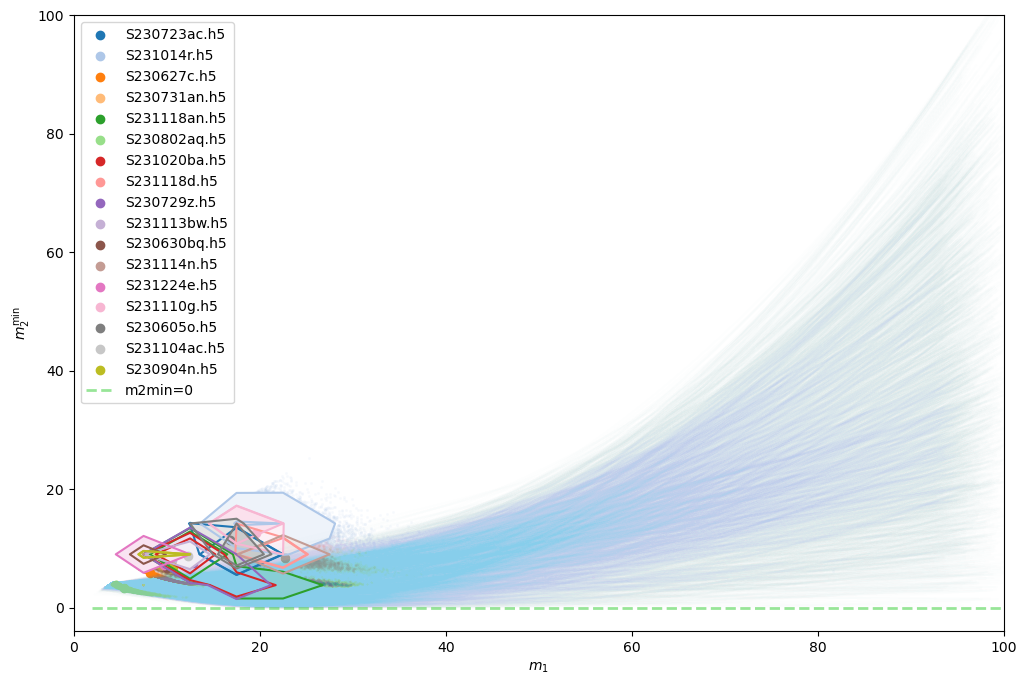

In [25]:
plt.rcParams["figure.figsize"] = (12,8)
cmap = plt.colormaps['tab20']
# Take colors at regular intervals spanning the colormap.
colors = cmap(np.linspace(0, 1, 20))
j=0

for i in range(2566):#len(result['posterior']['alpha'])):
    
    mass1_parabola_dyn = np.linspace(parabola_no190814_dict['mmin'][i], parabola_no190814_dict['mmax'][i],1000)
    m2min_parabola_dyn = parabola_m2min_m1(mass1_parabola_dyn, parabola_no190814_dict['mmax'][i], parabola_no190814_dict['mmin'][i],\
                     parabola_no190814_dict['gamma'][i], parabola_no190814_dict['zeta'][i])
    plt.plot(mass1_parabola_dyn, m2min_parabola_dyn, color='skyblue', alpha=0.01)

for filename in glob.glob("m1_q_event_samples/S*.h5"):
    mass1= h5py.File(filename)['mass_1']
    q=h5py.File(filename)['mass_ratio']
    
    eventname = (os.path.basename(filename))
    if np.median(np.array(q)*np.array(mass1))<15:
        corner.hist2d(np.array(mass1),np.array(q)*np.array(mass1), fill_contours=True, plot_density=False,\
                  range=[(0,100), (-4,100)], color=colors[j])
        plt.scatter(np.median(mass1),np.median(np.array(q)*np.array(mass1)), label=f'{eventname}', color=colors[j])
        j+=1


mass1_prior = np.linspace(2., 100.,1000)
plt.plot(mass1_prior, parabola_m2min_m1(mass1_prior, 100.,0.,0.,0.), color='limegreen', ls='dashed',\
         linewidth=2., label='m2min=0', alpha=0.5)
#plt.plot(mass1_prior, PL_m2min_m1(mass1_prior, 100.,2.,35.), color='teal', ls='dashed', label='PL prior')
plt.legend()
#dummy, = plt.plot(x[0], y[0], color='black', linestyle='solid')
plt.xlabel(r'$m_1$')
plt.ylabel(r'$m_2^{\rm min}$')


Text(0, 0.5, '$m_2^{\\rm min}$')

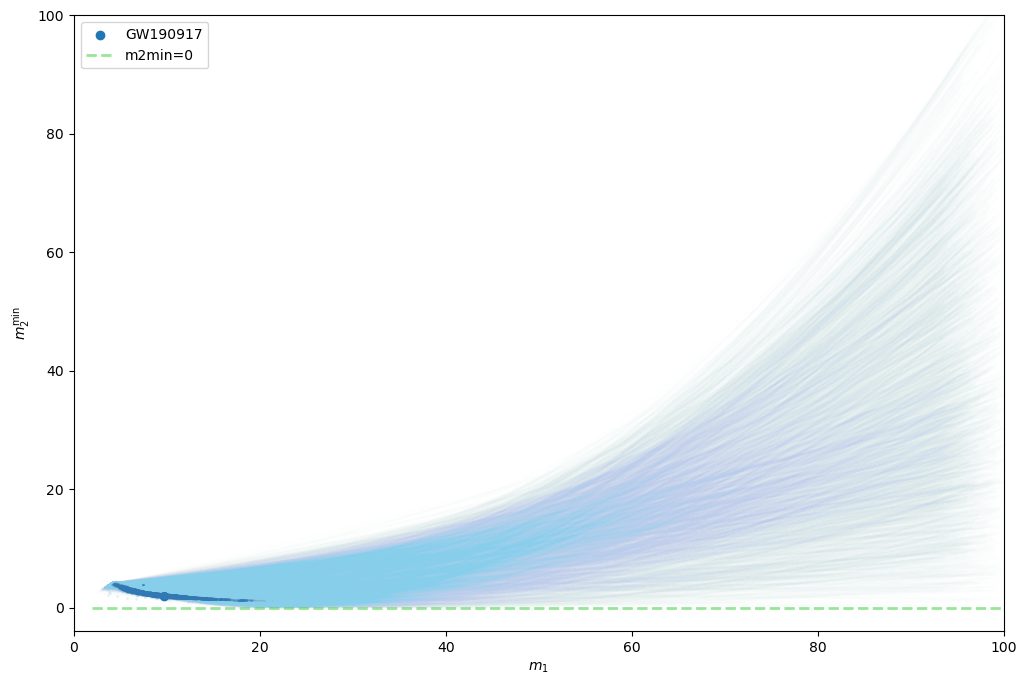

In [23]:
plt.rcParams["figure.figsize"] = (12,8)
cmap = plt.colormaps['tab20']
# Take colors at regular intervals spanning the colormap.
colors = cmap(np.linspace(0, 1, 20))
j=0

for i in range(2566):#len(result['posterior']['alpha'])):
    
    mass1_parabola_dyn = np.linspace(parabola_no190814_dict['mmin'][i], parabola_no190814_dict['mmax'][i],1000)
    m2min_parabola_dyn = parabola_m2min_m1(mass1_parabola_dyn, parabola_no190814_dict['mmax'][i], parabola_no190814_dict['mmin'][i],\
                     parabola_no190814_dict['gamma'][i], parabola_no190814_dict['zeta'][i])
    plt.plot(mass1_parabola_dyn, m2min_parabola_dyn, color='skyblue', alpha=0.01)

for filename in glob.glob("m1_q_event_samples/IGWN-GWTC2p1-v2-GW190917_114630_PEDataRelease_mixed_nocosmo.h5"):
    mass1= h5py.File(filename)['mass_1']
    q=h5py.File(filename)['mass_ratio']
    
    eventname = (os.path.basename(filename))[16:24]
    if np.median(np.array(q)*np.array(mass1))<15:
        corner.hist2d(np.array(mass1),np.array(q)*np.array(mass1), fill_contours=True, plot_density=False,\
                  range=[(0,100), (-4,100)], color=colors[j])
        plt.scatter(np.median(mass1),np.median(np.array(q)*np.array(mass1)), label=f'{eventname}', color=colors[j])
        j+=1


mass1_prior = np.linspace(2., 100.,1000)
plt.plot(mass1_prior, parabola_m2min_m1(mass1_prior, 100.,0.,0.,0.), color='limegreen', ls='dashed',\
         linewidth=2., label='m2min=0', alpha=0.5)
#plt.plot(mass1_prior, PL_m2min_m1(mass1_prior, 100.,2.,35.), color='teal', ls='dashed', label='PL prior')
plt.legend()
#dummy, = plt.plot(x[0], y[0], color='black', linestyle='solid')
plt.xlabel(r'$m_1$')
plt.ylabel(r'$m_2^{\rm min}$')
